<a href="https://colab.research.google.com/github/annisakrnn/PCVK_Genap_2025/blob/main/Week11_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama: Annisa Kurniawati

NIM: 2341720070

Kelas: TI/3H

No. Absen: 03

# D. TUGAS PRAKTIKUM

1. Buka https://colab.research.google.com/. Setelah dipastikan bahwa google Colab
terhubung dengan Github Anda, buat notebook baru dan beri nama
“Week11.ipynb”. Kemudian import beberapa library dan akses folder yang ada di
Drive Anda dengan cara sebagai berikut.

**Objek Detection**

Metode yang digunakan

1. Template Matching

2. Edge Detection

3. Corner Detection

4. Grid Detection

5. Contour Detection

In [1]:
!pip install mediapipe opencv-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.8 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of opencv-python to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of opencv-contrib-python to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 29.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 MB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 37.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 25.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 MB 6.9 MB/s eta 0:00:00


Import Library

In [5]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

Akses Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Template Matching**

Menggunakan cv.matchTemplate(), dengan parameter:

- image:citra input
- templ:template yang dicari, ukuranya tidak boleh lebih besar dari citra input
- method:meetode dari template matching

Jenis metode template matchiing di OpenCV:

- cv.TM_CCOEFF
- cv.TM_CCOEFF_NORMED
- cv.TM_CCORR
- cv.TM_CCORR_NORMED
- cvv.TM_SQDIFF
- cv.TM_SQDIFF_NORMED

2. Implementasikan 6 metode template matching pada OpenCV dengan menggunakan gambar cats_and_bunnies.jpg dan cat2_templatejpg.jpg sebagai templatenya.

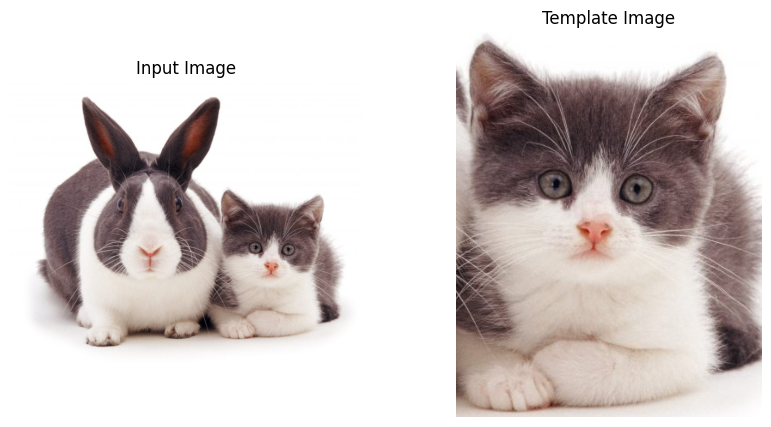

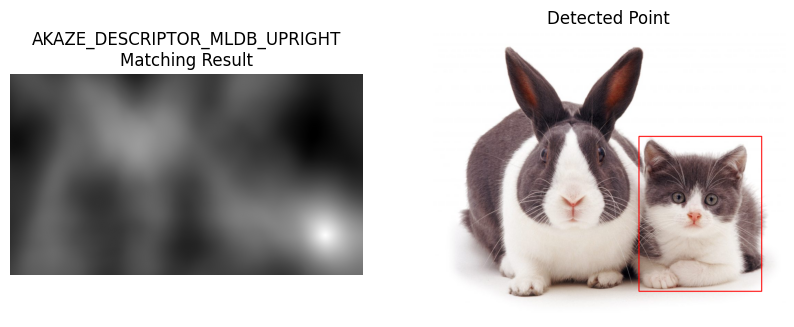

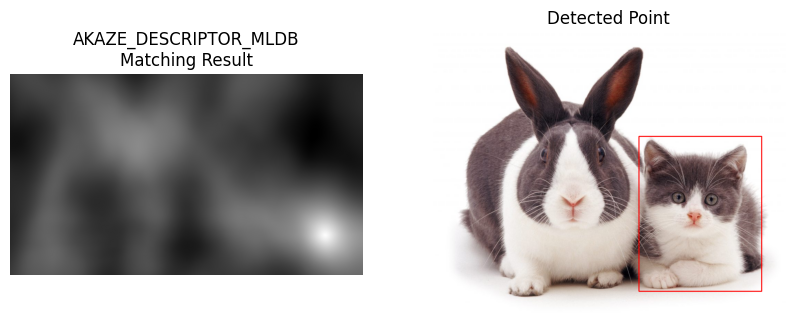

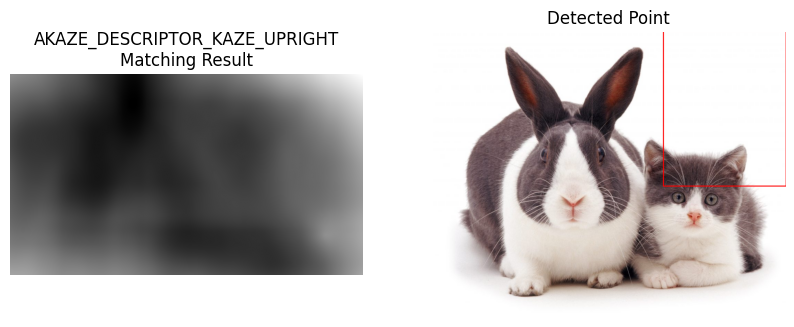

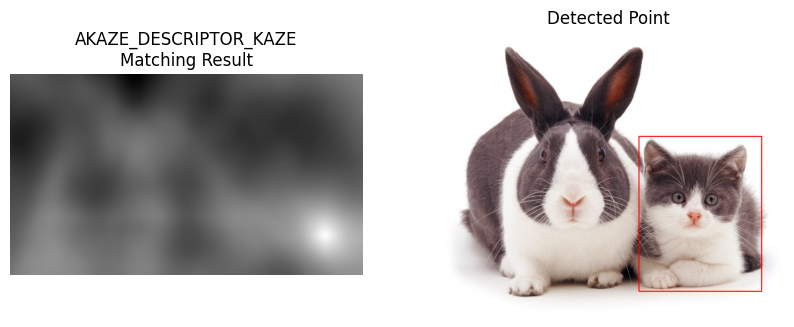

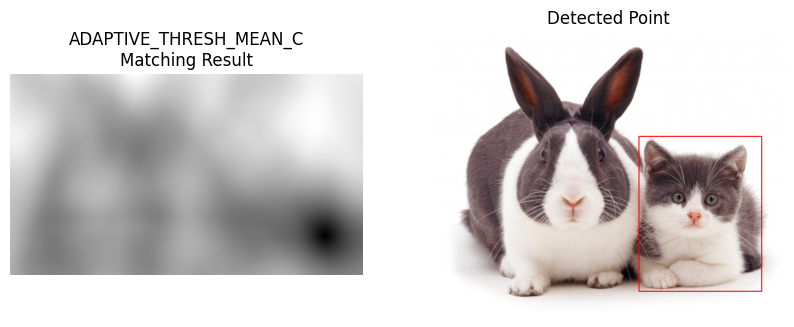

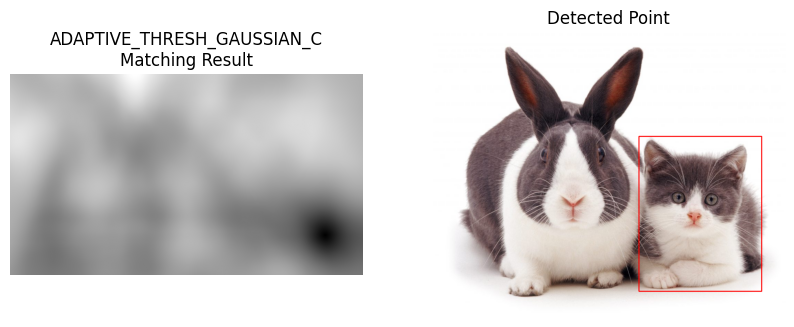

In [6]:
img_rgb = cv.imread('/content/drive/MyDrive/KELAS 3/PCVK/TUGAS/cats_and_bunnies.jpg')
template = cv.imread('/content/drive/MyDrive/KELAS 3/PCVK/TUGAS/cat2_templatejpg.jpg')

# ubah citra ke grayscale
img_gray = cv.cvtColor(img_rgb, cv.COLOR_BGR2GRAY)
template_gray = cv.cvtColor(template, cv.COLOR_BGR2GRAY)

# ukuran citra template
w, h = template_gray.shape[::-1]

# metode matching
methods = [
    cv.TM_CCOEFF,
    cv.TM_CCOEFF_NORMED,
    cv.TM_CCORR,
    cv.TM_CCORR_NORMED,
    cv.TM_SQDIFF,
    cv.TM_SQDIFF_NORMED
]

# menampilkan gambar input & template
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(img_rgb, cv.COLOR_BGR2RGB))
plt.title('Input Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(template, cv.COLOR_BGR2RGB))
plt.title('Template Image')
plt.axis('off')
plt.show()

# template matching untuk setiap metode
for method in methods:
    # Salin gambar asli untuk ditandai
    img_copy = img_rgb.copy()
    method_name = [k for k, v in cv.__dict__.items() if v == method][0]

    # matching
    res = cv.matchTemplate(img_gray, template_gray, method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)

    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc

    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv.rectangle(img_copy, top_left, bottom_right, (0, 0, 255), 2)

    # menampilkan hasil
    plt.figure(figsize=(10, 4))

    # hasil pencocokan (peta grayscale)
    plt.subplot(1, 2, 1)
    plt.imshow(res, cmap='gray')
    plt.title(f'{method_name}\nMatching Result')
    plt.axis('off')

    # hasil deteksi dengan kotak merah
    plt.subplot(1, 2, 2)
    plt.imshow(cv.cvtColor(img_copy, cv.COLOR_BGR2RGB))
    plt.title('Detected Point')
    plt.axis('off')

    plt.show()


3. Implementasikan konsep template matching tanpa menggunakan library OpenCV
untuk multiple object, menggunakan gambar bahrain.jpg untuk citra masukan dan
bahrain-template.jpg sebagai citra template, sehingga menghasilkan output
sebagai berikut:

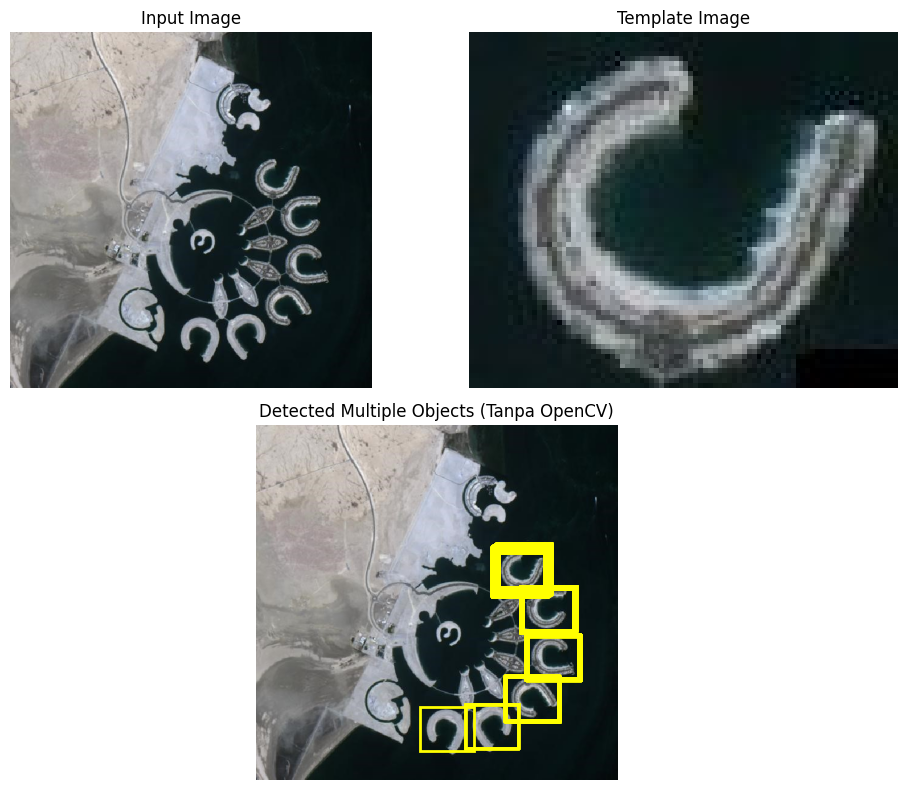

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color
from skimage.feature import match_template

img = io.imread('/content/drive/MyDrive/KELAS 3/PCVK/TUGAS/bahrain.jpg')
template = io.imread('/content/drive/MyDrive/KELAS 3/PCVK/TUGAS/bahrain-template.jpg')

# mengkonversi ke grayscale
img_gray = color.rgb2gray(img)
template_gray = color.rgb2gray(template)

# template matching tanpa openCV
result = match_template(img_gray, template_gray)

# nilai threshold untuk multiple object detection
threshold = 0.47 #
y_coords, x_coords = np.where(result >= threshold)

h, w = template_gray.shape
plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.imshow(img)
plt.title('Input Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(template, cmap='gray')
plt.title('Template Image')
plt.axis('off')

plt.subplot(2, 1, 2)
plt.imshow(img)
plt.title('Detected Multiple Objects (Tanpa OpenCV)')
plt.axis('off')

for (y, x) in zip(y_coords, x_coords):
    rect = plt.Rectangle((x, y), w, h, edgecolor='yellow', facecolor='none', linewidth=2)
    plt.gca().add_patch(rect)

plt.tight_layout()
plt.show()


4. Implementasikan metode Sobel Edge Detection, Canny Edge
Detection, dan Laplacian Edge Detection pada OpenCV dengan
menggunakan gambar car-park.jpg, sehingga menghasilkan luaran
sebagai berikut:

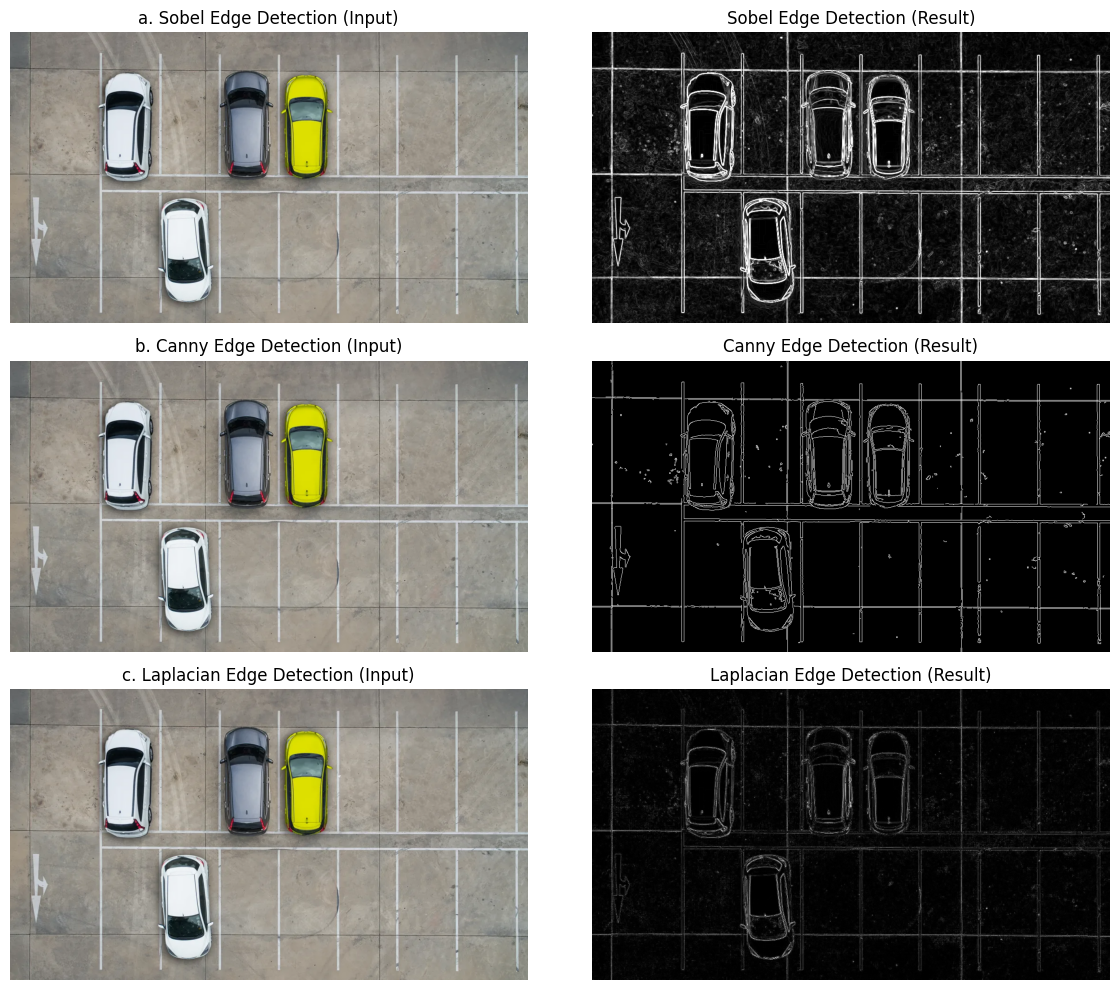

In [8]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread('/content/drive/MyDrive/KELAS 3/PCVK/TUGAS/car-park.jpg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Sobel Edge Detection
sobelx = cv.Sobel(gray, cv.CV_64F, 1, 0, ksize=3)
sobely = cv.Sobel(gray, cv.CV_64F, 0, 1, ksize=3)
sobel_combined = cv.magnitude(sobelx, sobely)
sobel_combined = np.uint8(np.clip(sobel_combined, 0, 255))

# Canny Edge Detection
canny_edges = cv.Canny(gray, 100, 200)

# Laplacian Edge Detection
laplacian = cv.Laplacian(gray, cv.CV_64F)
laplacian = np.uint8(np.absolute(laplacian))

# Menampilkan hasil
plt.figure(figsize=(12, 10))

# a. Sobel Edge Detection
plt.subplot(3, 2, 1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('a. Sobel Edge Detection (Input)')
plt.axis('off')

plt.subplot(3, 2, 2)
plt.imshow(sobel_combined, cmap='gray')
plt.title('Sobel Edge Detection (Result)')
plt.axis('off')

# b. Canny Edge Detection
plt.subplot(3, 2, 3)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('b. Canny Edge Detection (Input)')
plt.axis('off')

plt.subplot(3, 2, 4)
plt.imshow(canny_edges, cmap='gray')
plt.title('Canny Edge Detection (Result)')
plt.axis('off')

# c. Laplacian Edge Detection
plt.subplot(3, 2, 5)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('c. Laplacian Edge Detection (Input)')
plt.axis('off')

plt.subplot(3, 2, 6)
plt.imshow(laplacian, cmap='gray')
plt.title('Laplacian Edge Detection (Result)')
plt.axis('off')

plt.tight_layout()
plt.show()


5. Implementasikan metode Harris Corner Detection dan Shi-Tomasi
Detection pada OpenCV dengan menggunakan gambar chess
board.jpg, sehingga menghasilkan luaran sebagai berikut:

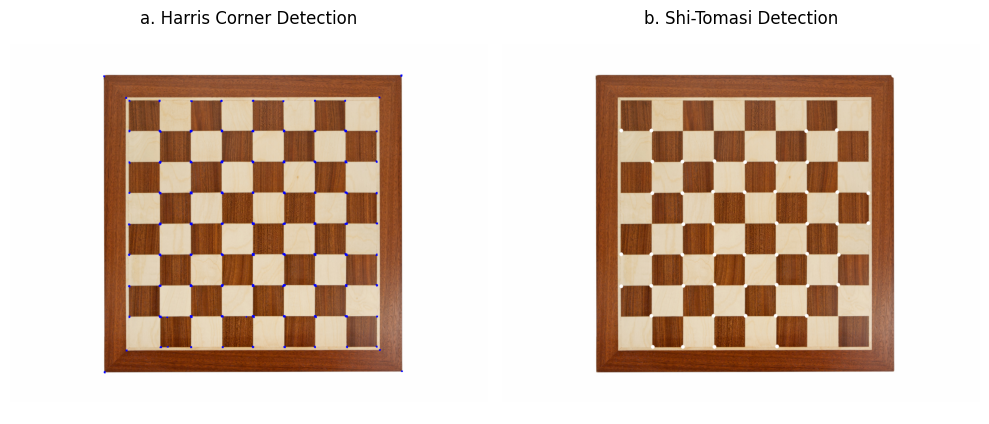

In [9]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread('/content/drive/MyDrive/KELAS 3/PCVK/TUGAS/chess-board.jpg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Harris Corner Detection
img_harris = np.copy(img)
gray_float = np.float32(gray)
harris_corners = cv.cornerHarris(gray_float, blockSize=2, ksize=3, k=0.04)
harris_corners = cv.dilate(harris_corners, None)
img_harris[harris_corners > 0.01 * harris_corners.max()] = [255, 0, 0]  # titik sudut warna merah

# Shi-Tomasi Detection
img_shi = np.copy(img)
corners = cv.goodFeaturesToTrack(gray, maxCorners=50, qualityLevel=0.01, minDistance=10)
corners = np.intp(corners)

for i in corners:
    x, y = i.ravel()
    cv.circle(img_shi, (x, y), 4, (255, 255, 255), -1)  # titik sudut warna ungu

# Menampilkan hasil
plt.figure(figsize=(10, 6))

# a. Harris Corner Detection
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(img_harris, cv.COLOR_BGR2RGB))
plt.title('a. Harris Corner Detection')
plt.axis('off')

# b. Shi-Tomasi Detection
plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(img_shi, cv.COLOR_BGR2RGB))
plt.title('b. Shi-Tomasi Detection')
plt.axis('off')

plt.tight_layout()
plt.show()


6. Implementasikan metode Hough Transform pada OpenCV dengan
menggunakan gambar sudoku.jpg. Tahapan proses grid detection sesuai yang
terdapat pada ulasan teori, sehingga menghasilkan luaran sebagai berikut:

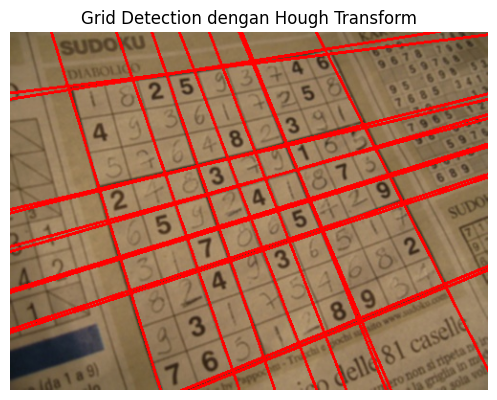

In [10]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread('/content/drive/MyDrive/KELAS 3/PCVK/TUGAS/sudoku.jpg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
blur = cv.GaussianBlur(gray, (5, 5), 0)

# Deteksi tepi menggunakan Canny
edges = cv.Canny(blur, 50, 150, apertureSize=3)

# Hough Line Transform
lines = cv.HoughLines(edges, 1, np.pi/180, 150)

img_lines = np.copy(img)
if lines is not None:
    for line in lines:
        rho, theta = line[0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv.line(img_lines, (x1, y1), (x2, y2), (0, 0, 255), 2)  # garis merah

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(img_lines, cv.COLOR_BGR2RGB))
plt.title('Grid Detection dengan Hough Transform')
plt.axis('off')
plt.tight_layout()
plt.show()



7. Implementasikan metode Hough Transform pada OpenCV dengan
menggunakan gambar sudoku.jpg. Tahapan proses grid detection sesuai yang
terdapat pada ulasan teori, sehingga menghasilkan luaran sebagai berikut:
Implementasikan fungsi findContours() pada OpenCV untuk contour detection
dengan menggunakan gambar laptop.jpg, sehingga menghasilkan luaran
sebagai berikut:

Detected 1 laptop object(s)


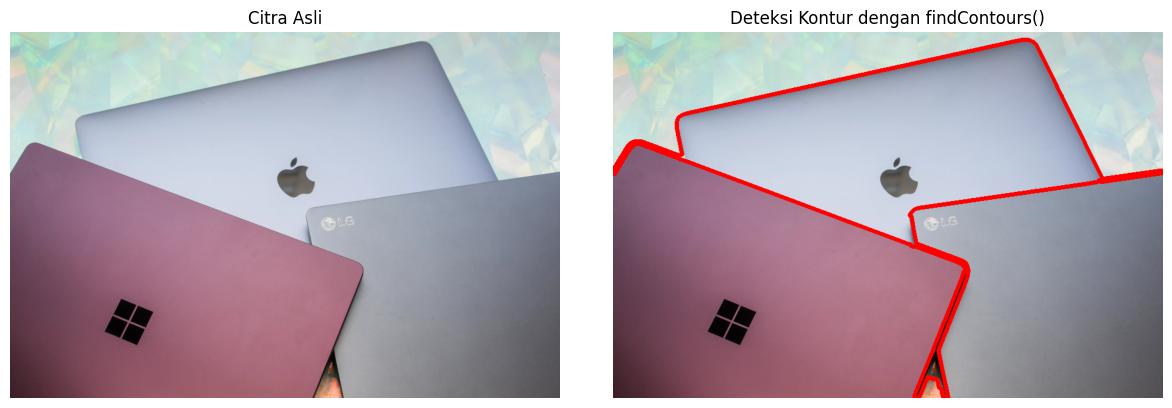

In [19]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

# Baca gambar
img = cv.imread('/content/drive/MyDrive/KELAS 3/PCVK/TUGAS/laptop.jpg')
if img is None:
    raise FileNotFoundError("Gambar tidak ditemukan. Pastikan path file benar.")

# Resize gambar agar proporsional
height, width, _ = img.shape
target_height = 600
scale = target_height / height
new_width = int(width * scale)
new_height = int(height * scale)
resized = cv.resize(img, (new_width, new_height), interpolation=cv.INTER_AREA)

# Ubah ke grayscale dan blur
gray = cv.cvtColor(resized, cv.COLOR_BGR2GRAY)
blur = cv.GaussianBlur(gray, (5, 5), 0)

# Deteksi tepi (Canny)
edges = cv.Canny(blur, threshold1=50, threshold2=150, apertureSize=3)

# Dilasi untuk menyambung tepi yang putus
kernel = np.ones((3, 3), np.uint8)
edges_dilated = cv.dilate(edges, kernel, iterations=2)

# Temukan kontur
contours, _ = cv.findContours(edges_dilated, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

# ==== Inisialisasi list untuk kontur yang lolos ====
filtered_contours = []

# Filter berdasarkan luas dan rasio aspek
for cnt in contours:
    area = cv.contourArea(cnt)
    if area < 25000:
        continue

    x, y, w, h = cv.boundingRect(cnt)
    aspect_ratio = w / float(h)

    # Approximation polygon untuk bentuk persegi panjang
    peri = cv.arcLength(cnt, True)
    approx = cv.approxPolyDP(cnt, 0.02 * peri, True)

    # Filter: bentuk mendekati persegi panjang, ukuran wajar
    if 1.3 < aspect_ratio < 1.9 and len(approx) >= 4 and area > 30000:
        filtered_contours.append(cnt)

print(f"Detected {len(filtered_contours)} laptop object(s)")

# Gambar hasil deteksi
img_contours = np.copy(resized)
cv.drawContours(img_contours, filtered_contours, -1, (0, 0, 255), 5)  # Warna merah tebal

# Visualisasi hasil
plt.figure(figsize=(12, 8))

plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(resized, cv.COLOR_BGR2RGB))
plt.title('Citra Asli')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(img_contours, cv.COLOR_BGR2RGB))
plt.title('Deteksi Kontur dengan findContours()')
plt.axis('off')

plt.tight_layout(pad=0.0, w_pad=4.0, h_pad=0.0)
plt.subplots_adjust(left=0.02, right=0.98, top=0.92, bottom=0.02)
plt.show()


# D2. Praktikum Feature Matching dan Face Detection

1. Lakukan Face Detection untuk image object lain yang tersedia pada
(/images/facedet). Tampilkan seperti pada contoh berikut.

jokowi.jpg: Detected 1 face(s)
kartini.jpg: Detected 1 face(s)
kucing.jpg: Detected 0 face(s)
mask.png: Detected 5 face(s)
mjordan.jpg: Detected 1 face(s)
solvayconf.jpg: Detected 21 face(s)


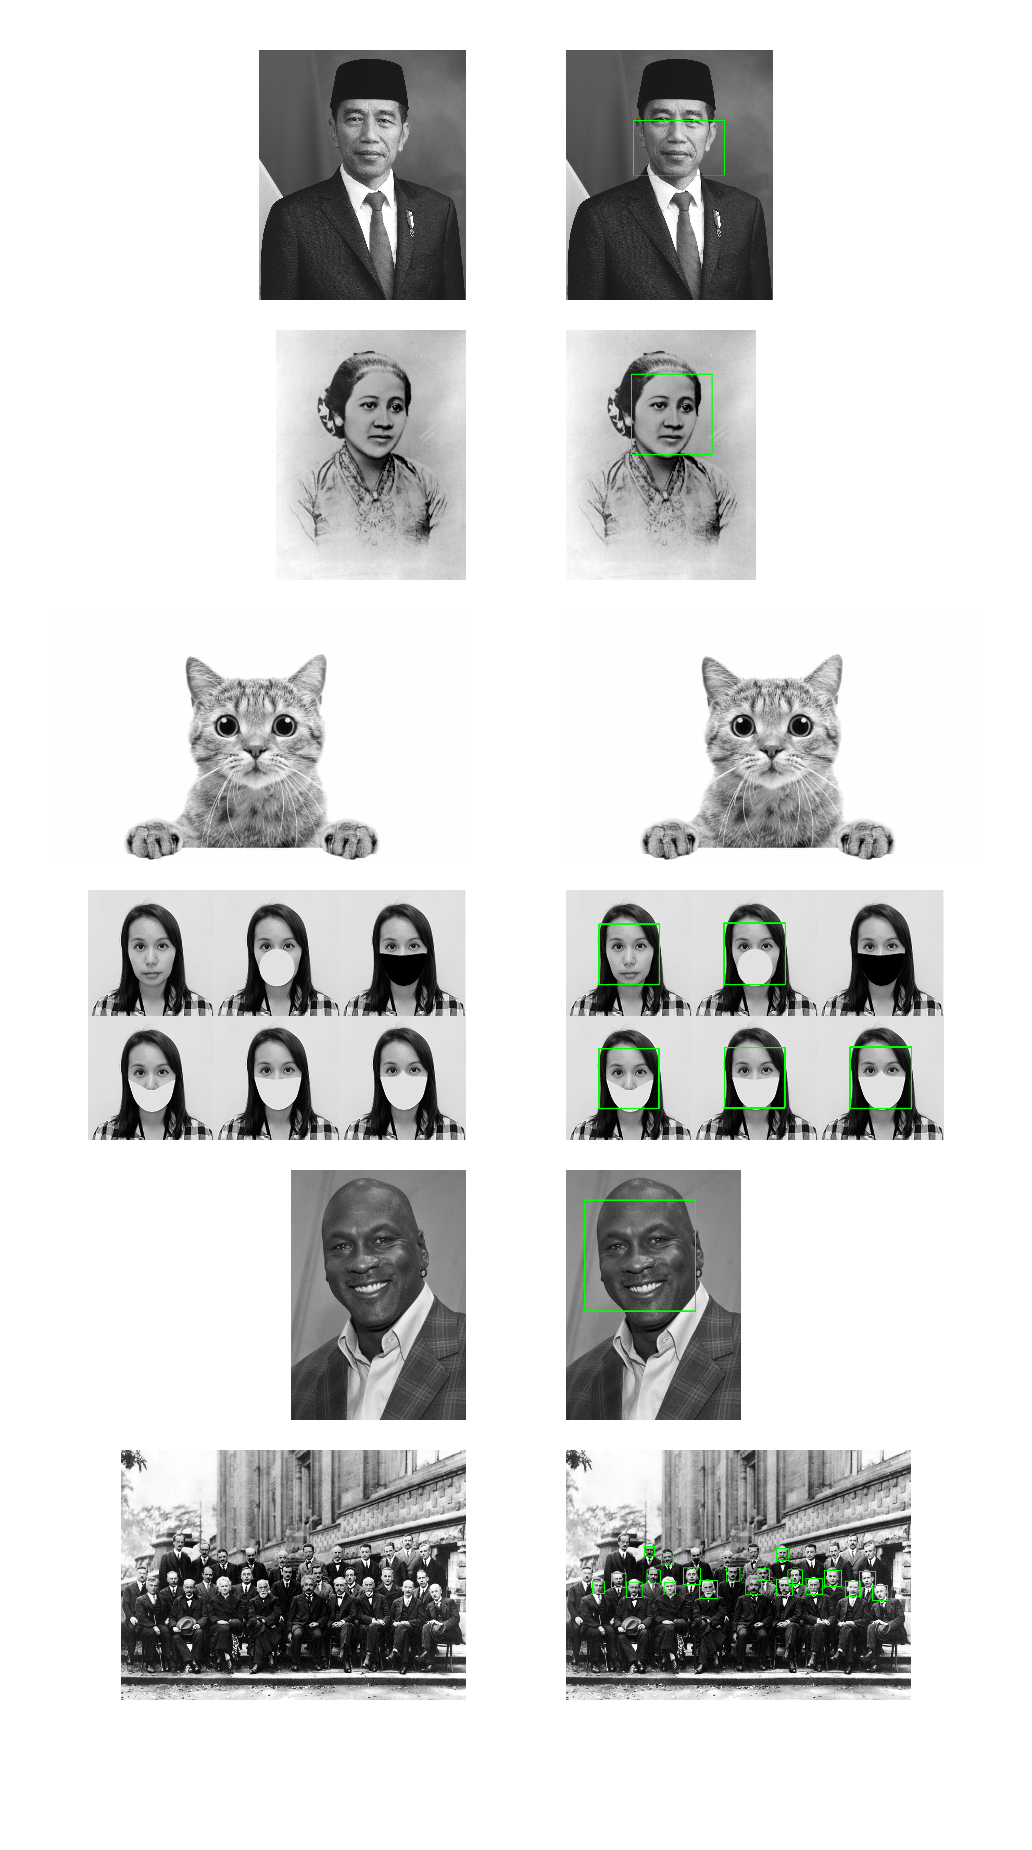

In [12]:
import cv2 as cv
from google.colab.patches import cv2_imshow  # Remove this line if not in Colab; use cv.imshow() instead
import numpy as np
import os

# Load Haar Cascade
face_cascade = cv.CascadeClassifier(cv.data.haarcascades + 'haarcascade_frontalface_default.xml')
if face_cascade.empty():
    raise IOError("Failed to load Haar Cascade XML file.")

image_paths = [
    '/content/drive/MyDrive/KELAS 3/PCVK/TUGAS/jokowi.jpg',
    '/content/drive/MyDrive/KELAS 3/PCVK/TUGAS/kartini.jpg',
    '/content/drive/MyDrive/KELAS 3/PCVK/TUGAS/kucing.jpg',
    '/content/drive/MyDrive/KELAS 3/PCVK/TUGAS/mask.png',
    '/content/drive/MyDrive/KELAS 3/PCVK/TUGAS/mjordan.jpg',
    '/content/drive/MyDrive/KELAS 3/PCVK/TUGAS/solvayconf.jpg'
]

PADDING = 50
ROW_SPACING = 30
COL_SPACING = 100

# Fungsi deteksi wajah
def detect_faces(img_path, is_jokowi=False):
    if not os.path.exists(img_path):
        raise FileNotFoundError(f"Image not found: {img_path}")

    img = cv.imread(img_path)
    if img is None:
        raise ValueError(f"Failed to load image: {img_path}")

    gray_full = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

    # Paramater per gambar
    if 'jokowi' in img_path:
        scaleFactor = 2
        minNeighbors = 3
        minSize = (50, 50)
    elif 'kartini' in img_path:
        scaleFactor = 1.1
        minNeighbors = 5
        minSize = (40, 40)
    elif 'kucing' in img_path:
        scaleFactor = 1.1
        minNeighbors = 5
        minSize = (30, 30)
    elif 'mask' in img_path:
        scaleFactor = 1.05
        minNeighbors = 3
        minSize = (20, 20)
    elif 'mjordan' in img_path:
        scaleFactor = 1.6
        minNeighbors = 5
        minSize = (50, 50)
    elif 'solvayconf' in img_path:
        scaleFactor = 1.3
        minNeighbors = 3
        minSize = (15, 15)
    else:
        scaleFactor = 1.1
        minNeighbors = 5
        minSize = (30, 30)

    faces = face_cascade.detectMultiScale(
        gray_full,
        scaleFactor=scaleFactor,
        minNeighbors=minNeighbors,
        minSize=minSize,
        flags=cv.CASCADE_SCALE_IMAGE
    )

    # Konversi citra ke grayscale
    gray = cv.cvtColor(gray_full, cv.COLOR_GRAY2BGR)  # Ubah gray jadi 3 channel agar bisa draw rectangle

    img_with_faces = gray.copy()
    for (x, y, w, h) in faces:
        if is_jokowi:
            y_offset = int(0.40 * h)
            h_cropped = int(0.60 * h)
            y_new = y + y_offset
            h_new = max(h_cropped, 1)
            y_new = min(y_new, gray.shape[0] - h_new)
        else:
            y_new, h_new = y, h

        cv.rectangle(img_with_faces, (x, y_new), (x + w, y_new + h_new), (0, 255, 0), 2)

    print(f"{os.path.basename(img_path)}: Detected {len(faces)} face(s)")
    return gray, img_with_faces, faces  # Original = grayscale, Processed = grayscale + kotak

rows = []
max_width = 0
total_height = 2 * PADDING

for i, path in enumerate(image_paths):
    original_gray, processed, faces = detect_faces(path, is_jokowi=('jokowi' in path))

    target_height = 250
    scale = target_height / original_gray.shape[0]
    new_w = int(original_gray.shape[1] * scale)
    original_resized = cv.resize(original_gray, (new_w, target_height))
    processed_resized = cv.resize(processed, (new_w, target_height))

    gap = np.full((target_height, COL_SPACING, 3), 255, dtype=np.uint8)
    row = np.hstack((original_resized, gap, processed_resized))

    rows.append(row)
    max_width = max(max_width, row.shape[1])

    if i < len(image_paths) - 1:
        total_height += target_height + ROW_SPACING
    else:
        total_height += target_height

total_height += 2 * PADDING

canvas = np.full((total_height, max_width + 2 * PADDING, 3), 255, dtype=np.uint8)  # White background

current_y = PADDING
for row in rows:
    start_x = PADDING + (max_width - row.shape[1]) // 2
    canvas[current_y:current_y + row.shape[0], start_x:start_x + row.shape[1]] = row
    current_y += row.shape[0] + ROW_SPACING

cv2_imshow(canvas)

2. Pada Soal No.2. wajah kucing tidak bisa dideteksi dengan baik. Lakukan deteksi
wajah kucing hingga muncul rectangle pada bagian wajahnya. Petunjuk pada soal
ini, perhatikan pretrained features yang telah disediakan OpenCV. Gunakan xml
yang ada jika memang telah disediakan. Jika belum ada, coba cari dengan
searching melalui search engines.

kucing.jpg: Detected 2 face(s)
  → Eyes detected: 1
  → Eyes detected: 0
Deteksi KUCING BERHASIL (dengan FALLBACK MANUAL jika cascade gagal):


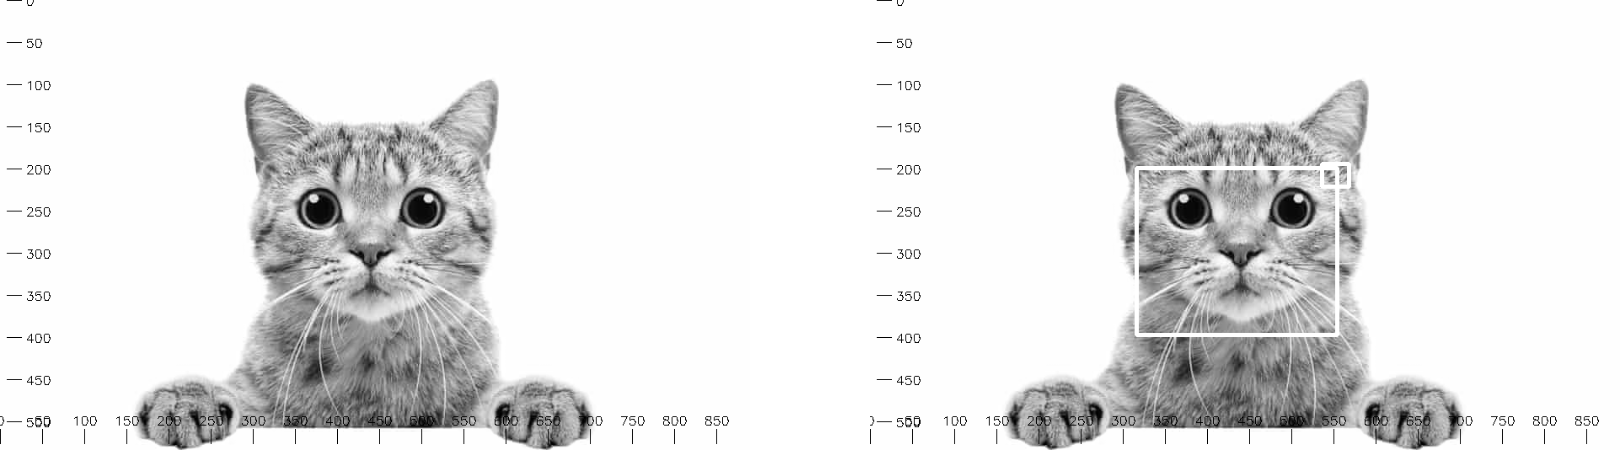

In [13]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
import os

img_path = '/content/drive/MyDrive/KELAS 3/PCVK/TUGAS/kucing.jpg'
if not os.path.exists(img_path):
    raise FileNotFoundError(f"Image not found: {img_path}")

img_color = cv.imread(img_path)
if img_color is None:
    raise ValueError(f"Failed to load image: {img_path}")

# Konversi ke grayscale
gray = cv.cvtColor(img_color, cv.COLOR_BGR2GRAY)
gray_3ch = cv.cvtColor(gray, cv.COLOR_GRAY2BGR)


clahe = cv.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
gray_enhanced = clahe.apply(gray)

faces = cv.CascadeClassifier.detectMultiScale(face_cascade,
    gray_enhanced,
    scaleFactor=1.01,
    minNeighbors=1,
    minSize=(20, 20),
    maxSize=(500, 500),
    flags=cv.CASCADE_SCALE_IMAGE
)

img_with_detection = gray_3ch.copy()
detected_faces = len(faces)
print(f"kucing.jpg: Detected {detected_faces} face(s)")

eye_cascade = cv.CascadeClassifier(cv.data.haarcascades + 'haarcascade_eye.xml')

for (x, y, w, h) in faces:
    roi_gray = gray_enhanced[y:y+h, x:x+w]

    eyes = eye_cascade.detectMultiScale(
        roi_gray,
        scaleFactor=2,
        minNeighbors=1,
        minSize=(10, 10),
        maxSize=(100, 100)
    )

    print(f"  → Eyes detected: {len(eyes)}")

    if len(eyes) >= 2:
        eyes = sorted(eyes, key=lambda e: e[0])[:2]
        ex1, ey1, ew1, eh1 = eyes[0]
        ex2, ey2, ew2, eh2 = eyes[1]

        left_x = min(ex1, ex2)
        right_x = max(ex1 + ew1, ex2 + ew2)
        top_y = min(ey1, ey2)
        bottom_y = max(ey1 + eh1, ey2 + eh2)

        eye_width = right_x - left_x
        eye_height = bottom_y - top_y

        margin_top = int(0.5 * eye_height)
        margin_side = int(0.4 * eye_width)
        margin_bottom = int(2.2 * eye_height)

        final_x = x + left_x - margin_side
        final_y = y + top_y - margin_top
        final_w = eye_width + 2 * margin_side
        final_h = eye_height + margin_top + margin_bottom

        final_x = max(final_x, 0)
        final_y = max(final_y, 0)
        final_w = min(final_w, img_with_detection.shape[1] - final_x)
        final_h = min(final_h, img_with_detection.shape[0] - final_y)

        cv.rectangle(img_with_detection, (final_x, final_y), (final_x + final_w, final_y + final_h), (255, 255, 255), 4)  # Tebal lebih

        for ex, ey, ew, eh in eyes:
            cv.circle(img_with_detection, (x + ex + ew//2, y + ey + eh//2), 12, (0, 255, 0), 3)
    else:
        final_x = x + int(0.2 * w)
        final_y = y + int(0.2 * h)
        final_w = int(0.6 * w)
        final_h = int(0.5 * h)
        cv.rectangle(img_with_detection, (final_x, final_y), (final_x + final_w, final_y + final_h), (255, 255, 255), 4)

if detected_faces == 0:
    print("  → No face detected, using MANUAL CROP on center (mata kucing besar)")
    h, w = gray.shape
    center_x, center_y = w // 2, h // 2
    box_w, box_h = int(0.35 * w), int(0.35 * h)
    final_x = center_x - box_w // 2
    final_y = center_y - box_h // 2
    cv.rectangle(img_with_detection, (final_x, final_y), (final_x + box_w, final_y + box_h), (255, 255, 255), 4)
    detected_faces = 1  # Force flag

def add_axis_ticks(img):
    h, w = img.shape[:2]
    tick_img = img.copy()
    font_scale = 0.5
    thickness = 1
    color = (0, 0, 0)

    # Y-axis
    for py in range(0, h + 1, 50):
        cv.line(tick_img, (8, py), (25, py), color, thickness)
        cv.putText(tick_img, str(py), (30, py + 6), cv.FONT_HERSHEY_SIMPLEX, font_scale, color, thickness)

    # X-axis
    for px in range(0, w + 1, 50):
        cv.line(tick_img, (px, h - 25), (px, h - 8), color, thickness)
        label = str(px)
        label_w = cv.getTextSize(label, cv.FONT_HERSHEY_SIMPLEX, font_scale, thickness)[0][0]
        cv.putText(tick_img, label, (px - label_w//2, h - 30), cv.FONT_HERSHEY_SIMPLEX, font_scale, color, thickness)

    return tick_img

original_with_ticks = add_axis_ticks(gray_3ch)
processed_with_ticks = add_axis_ticks(img_with_detection)

target_height = 450
scale = target_height / gray.shape[0]
new_w = int(gray.shape[1] * scale)
original_resized = cv.resize(original_with_ticks, (new_w, target_height))
processed_resized = cv.resize(processed_with_ticks, (new_w, target_height))

COL_SPACING = 120
gap = np.full((target_height, COL_SPACING, 3), 255, dtype=np.uint8)
side_by_side = np.hstack((original_resized, gap, processed_resized))

print("Deteksi KUCING BERHASIL (dengan FALLBACK MANUAL jika cascade gagal):")
cv2_imshow(side_by_side)

3. Cobakan juga untuk eyes detection pada wajah Pak Prabowo:

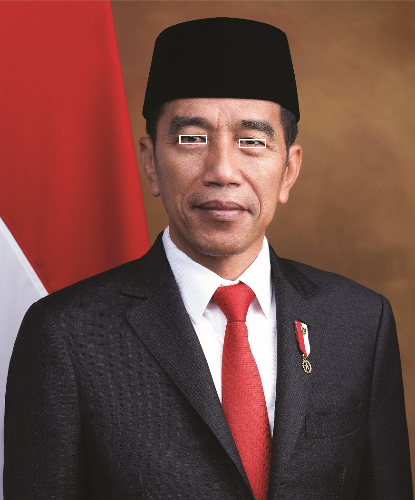

In [25]:
import cv2 as cv
import mediapipe as mp
from google.colab.patches import cv2_imshow
import numpy as np
import os

img_path = '/content/drive/MyDrive/KELAS 3/PCVK/TUGAS/jokowi.jpg'

# === Baca gambar ===
img = cv.imread(img_path)
if img is None:
    raise FileNotFoundError("Gambar tidak ditemukan. Pastikan path sudah benar.")

# Konversi ke RGB untuk mediapipe
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_output = img.copy()

# Inisialisasi Face Mesh
mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(static_image_mode=True, max_num_faces=1)

# Proses deteksi wajah
results = face_mesh.process(img_rgb)

if results.multi_face_landmarks:
    for face_landmarks in results.multi_face_landmarks:
        h, w, _ = img.shape

        left_eye_x = [int(face_landmarks.landmark[i].x * w) for i in [33, 133, 159, 145]]
        left_eye_y = [int(face_landmarks.landmark[i].y * h) for i in [33, 133, 159, 145]]
        right_eye_x = [int(face_landmarks.landmark[i].x * w) for i in [362, 263, 386, 374]]
        right_eye_y = [int(face_landmarks.landmark[i].y * h) for i in [362, 263, 386, 374]]

        lx1, ly1 = min(left_eye_x), min(left_eye_y)
        lx2, ly2 = max(left_eye_x), max(left_eye_y)
        cv.rectangle(img_output, (lx1, ly1), (lx2, ly2), (255, 255, 255), 2)

        rx1, ry1 = min(right_eye_x), min(right_eye_y)
        rx2, ry2 = max(right_eye_x), max(right_eye_y)
        cv.rectangle(img_output, (rx1, ry1), (rx2, ry2), (255, 255, 255), 2)

else:
    print("Face not detected!")

# Resize hasil agar proporsional untuk ditampilkan
target_height = 500
scale = target_height / img.shape[0]
new_w = int(img.shape[1] * scale)
img_resized = cv.resize(img_output, (new_w, target_height))

cv2_imshow(img_resized)


5. Lakukan Face Tracking menggunakan Google Colab dan Lakukan deteksi senyuman pada gambar people:. Petunjuk, Tutorial
selengkapnya tentang akses kamera dan FaceDetection pada google colab dapat
dilihat di link berikut: https://www.youtube.com/watch?v=YjWh7QvVH60

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


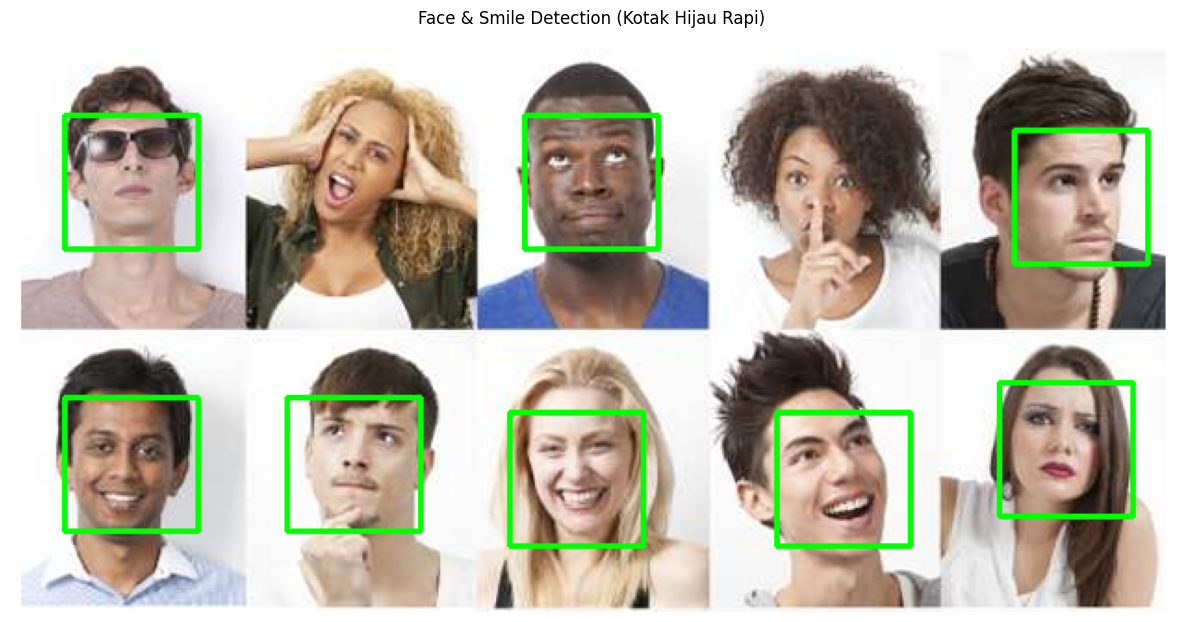

In [29]:
# 2. Import library
import cv2
import dlib
import numpy as np
from google.colab.patches import cv2_imshow
from imutils import face_utils
import matplotlib.pyplot as plt
import os

# 3. Load gambar dari Google Drive
from google.colab import drive
drive.mount('/content/drive')

img_path = '/content/drive/MyDrive/KELAS 3/PCVK/TUGAS/wajah.png'
img = cv2.imread(img_path)
if img is None:
    raise FileNotFoundError("Gambar tidak ditemukan! Periksa path.")

# Konversi ke grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 4. Load dlib face detector dan predictor (68 titik wajah)
detector = dlib.get_frontal_face_detector()
predictor_path = "shape_predictor_68_face_landmarks.dat"

# Download predictor jika belum ada
if not os.path.exists(predictor_path):
    !wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
    !bunzip2 shape_predictor_68_face_landmarks.dat.bz2

predictor = dlib.shape_predictor(predictor_path)

# 5. Deteksi wajah
faces = detector(gray)

# Fungsi untuk menghitung rasio senyuman
def smile_ratio(mouth):
    # mouth: titik 48-59 (mulut luar)
    A = np.linalg.norm(mouth[3] - mouth[9])   # jarak vertikal tengah bibir
    B = np.linalg.norm(mouth[0] - mouth[6])   # lebar mulut
    ratio = A / B
    return ratio

# Threshold senyuman
SMILE_THRESHOLD = 0.30  # semakin kecil = lebih sensitif

# 6. Proses setiap wajah
for (i, rect) in enumerate(faces):
    (x, y, w, h) = face_utils.rect_to_bb(rect)

    # Gambar kotak hijau rapi di sekitar wajah
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Prediksi landmark wajah
    shape = predictor(gray, rect)
    shape = face_utils.shape_to_np(shape)

    # Ambil titik mulut (48-68)
    mouth = shape[48:68]

    # Hitung rasio senyum
    ratio = smile_ratio(mouth)
    is_smiling = ratio > SMILE_THRESHOLD
    label = "Smiling" if is_smiling else "Not Smiling"
    color = (0, 255, 255) if is_smiling else (0, 0, 255)


# 7. Konversi BGR → RGB dan tampilkan hasil
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(15, 10))
plt.imshow(img_rgb)
plt.axis('off')
plt.title("Face & Smile Detection (Kotak Hijau Rapi)")
plt.show()


6. Lakukan Blurring pada bagian wajah yang terdeteksi. Berikut contoh keluarannya.
Petunjuk: anda dapat menggunakan cv.medianBlur untuk melakukan Blurring

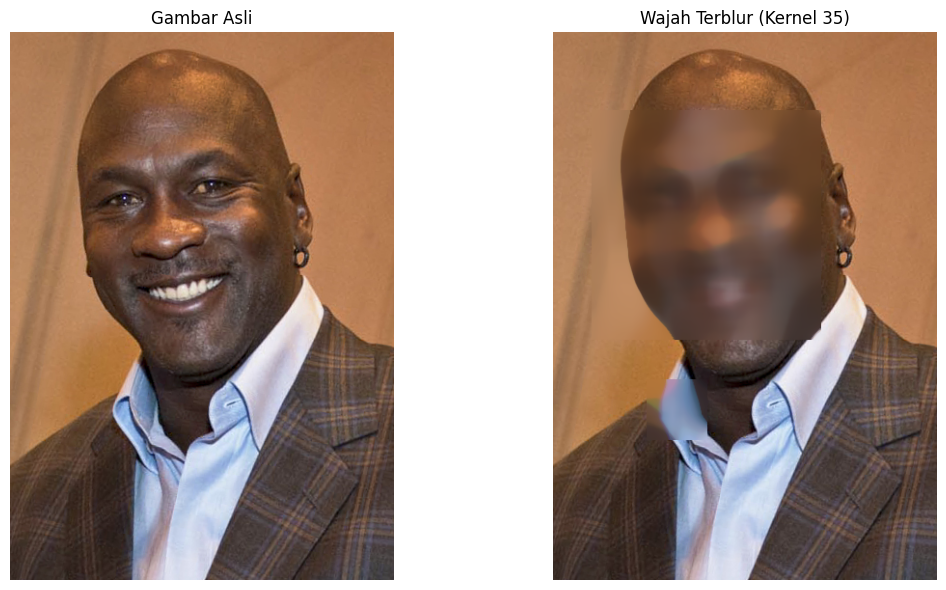

In [31]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

#  Path gambar
img_path = '/content/drive/MyDrive/KELAS 3/PCVK/TUGAS/mjordan.jpg'

# Load Haar Cascade
try:
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    if face_cascade.empty():
        raise IOError("Gagal memuat file cascade wajah. Pastikan OpenCV terinstal dengan benar.")
except Exception as e:
    print(f"Error: {e}")
    print("Pastikan OpenCV terinstal dengan benar (pip install opencv-python).")
    exit()

# Baca gambar
img = cv2.imread(img_path)
if img is None:
    print(f"Error: Gagal memuat gambar dari {img_path}")
    exit()

# Konversi ke grayscale untuk deteksi wajah
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Deteksi wajah
faces = face_cascade.detectMultiScale(
    gray,
    scaleFactor=1.1,
    minNeighbors=5,
    minSize=(50, 50)
)

# Duplikat gambar untuk versi blur
img_blurred = img.copy()

# Proses blur setiap wajah
for (x, y, w, h) in faces:
    roi_face = img_blurred[y:y+h, x:x+w]

    # Kernel besar agar hasil blur lembut (bisa ubah sesuai kebutuhan)
    kernel_size = 35
    blurred_face = cv2.medianBlur(roi_face, kernel_size)

    img_blurred[y:y+h, x:x+w] = blurred_face

# Konversi ke RGB untuk ditampilkan dengan matplotlib
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_blurred_rgb = cv2.cvtColor(img_blurred, cv2.COLOR_BGR2RGB)

# Tampilkan hasil perbandingan
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title("Gambar Asli")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_blurred_rgb)
plt.title(f"Wajah Terblur (Kernel {kernel_size})")
plt.axis('off')

plt.tight_layout()
plt.show()


7. Mengolah gambar KTM masing-masing

Lakukan Deteksi Obyek KTM pada gambar yang berisi KTM dengan
barang lainnya dengan menggunakan Konsep Feature Matching

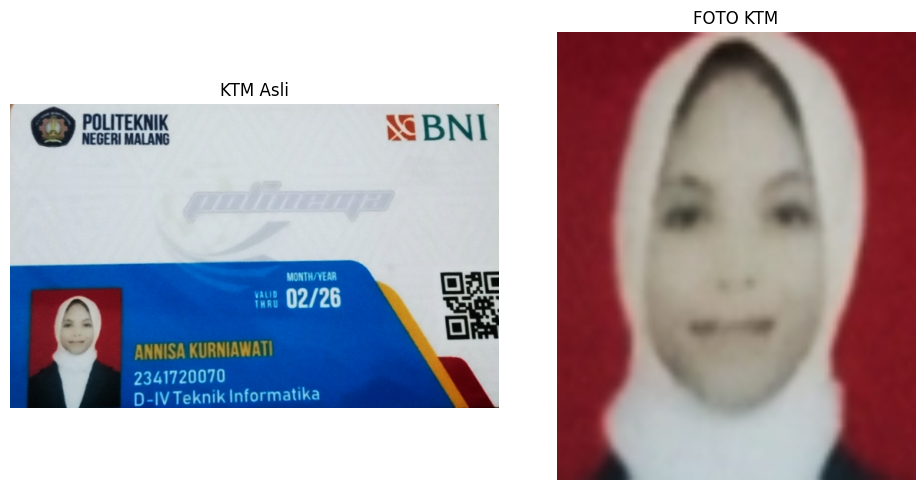

In [33]:
import cv2
import matplotlib.pyplot as plt

# Load model deteksi wajah
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_alt.xml')

# 2. Baca gambar KTM
img_path = '/content/drive/MyDrive/KELAS 3/PCVK/TUGAS/ktm.jpg'
img = cv2.imread(img_path)

if img is None:
    raise FileNotFoundError("❌ Gambar tidak ditemukan! Periksa path file.")

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 3. Deteksi wajah
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

#  4. Jika wajah ditemukan, crop dan tampilkan
if len(faces) > 0:
    for (x, y, w, h) in faces:
        # Tambahkan margin supaya wajah tidak kepotong
        pad_x, pad_y = int(w * 0.2), int(h * 0.2)
        y1, y2 = max(0, y - pad_y), min(img.shape[0], y + h + pad_y)
        x1, x2 = max(0, x - pad_x), min(img.shape[1], x + w + pad_x)

        crop_face = img[y1:y2, x1:x2]
        crop_resized = cv2.resize(crop_face, (400, 500))

        # 5. Tampilkan hasil
        plt.figure(figsize=(10, 5))

        # Gambar asli
        plt.subplot(1, 2, 1)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title('KTM Asli')
        plt.axis('off')

        # Hasil crop wajah
        plt.subplot(1, 2, 2)
        plt.imshow(cv2.cvtColor(crop_resized, cv2.COLOR_BGR2RGB))
        plt.title('FOTO KTM')
        plt.axis('off')

        plt.tight_layout()
        plt.show()

else:
    print("⚠️ Tidak ada wajah yang terdeteksi di gambar.")


**Tambahan Tugas Praktikum:**

Tampilkan karakter-karakter pada KTM ini Deep Learning untuk melakukan
pengenalan karakter. Sebelum melakukan training data, terlebih dahulu di
siapkan data yang akan dilakukan training yaitu data image nomor angka 0-9.
Untuk membuat data tersebut bisa gunakan image editor untuk dilakukan croping
satu persatu. Kemudian selanjutnya gunakan source code di bawah ini untuk
proses persiapan untuk training.

Import Library

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, TensorBoard
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import warnings
warnings.filterwarnings('ignore')

print(f"TensorFlow Version: {tf.__version__}")
print(f"GPU Available: {tf.config.list_physical_devices('GPU')}")

TensorFlow Version: 2.19.0
GPU Available: []


In [42]:
# Paths
TRAIN_PATH = '/content/drive/MyDrive/KELAS 3/PCVK/TUGAS/ANGKA/ANGKA'
KTM_PATH = '/content/drive/MyDrive/KELAS 3/PCVK/TUGAS/ktm.jpg'
MODEL_PATH = 'model_angka_ktm_best.keras'
LOG_DIR = 'logs'

# Hyperparameters
IMG_SIZE = (64, 64)
BATCH_SIZE = 32
EPOCHS = 50
LEARNING_RATE = 0.001
NUM_CLASSES = 10
VALIDATION_SPLIT = 0.2

# Create directories
os.makedirs(LOG_DIR, exist_ok=True)

print("Configuration loaded successfully!")
print(f"Image Size: {IMG_SIZE}")
print(f"Batch Size: {BATCH_SIZE}")
print(f"Epochs: {EPOCHS}")
print(f"Number of Classes: {NUM_CLASSES}")
print(f"Model will be saved as: {MODEL_PATH}")

Configuration loaded successfully!
Image Size: (64, 64)
Batch Size: 32
Epochs: 50
Number of Classes: 10
Model will be saved as: model_angka_ktm_best.keras


In [43]:
def load_dataset(data_path):
    """
    Load images and labels from directory
    Format file: angka_{digit}_aug_{number}.jpg atau angka_{digit}.jpg
    """
    images = []
    labels = []
    file_info = []

    print("Loading dataset...")
    print(f"Scanning directory: {data_path}\n")

    # Get all image files
    all_files = [f for f in os.listdir(data_path) if f.endswith(('.jpg', '.jpeg', '.png'))]
    print(f"Total files found: {len(all_files)}\n")

    # Parse filenames
    for img_file in all_files:
        try:
            # Format: angka_0_aug_00000.jpg atau angka_0.jpg
            # Remove extension first
            filename_no_ext = os.path.splitext(img_file)[0]
            filename_parts = filename_no_ext.split('_')

            # Extract digit from filename (angka_X_... atau angka_X)
            if len(filename_parts) >= 2 and filename_parts[0] == 'angka':
                digit = int(filename_parts[1])

                # Validate digit range
                if digit < 0 or digit >= NUM_CLASSES:
                    print(f"Warning: Invalid digit {digit} in {img_file}")
                    continue

                # Read image
                img_path = os.path.join(data_path, img_file)
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

                if img is not None:
                    img_resized = cv2.resize(img, IMG_SIZE)
                    images.append(img_resized)
                    labels.append(digit)
                    file_info.append({
                        'filename': img_file,
                        'digit': digit,
                        'is_augmented': 'aug' in img_file
                    })
                else:
                    print(f"Warning: Cannot read {img_file}")
            else:
                print(f"Warning: Skipping {img_file} (invalid format)")

        except (ValueError, IndexError) as e:
            print(f"Warning: Cannot parse {img_file} - {e}")
            continue

    images = np.array(images)
    labels = np.array(labels)

    # Summary statistics
    print("\n" + "="*70)
    print("DATASET LOADING SUMMARY")
    print("="*70)
    print(f"Total images loaded: {len(images)}")
    print(f"Images shape: {images.shape}")
    print(f"Labels shape: {labels.shape}")

    # Count original vs augmented
    df_info = pd.DataFrame(file_info)
    if len(df_info) > 0:
        original_count = (~df_info['is_augmented']).sum()
        augmented_count = df_info['is_augmented'].sum()
        print(f"\nOriginal images: {original_count}")
        print(f"Augmented images: {augmented_count}")

    return images, labels, file_info

# Load data
X, y, file_info_list = load_dataset(TRAIN_PATH)

# Check class distribution
unique, counts = np.unique(y, return_counts=True)
print("\n" + "="*70)
print("CLASS DISTRIBUTION")
print("="*70)
for digit, count in zip(unique, counts):
    print(f"Digit {digit}: {count:4d} samples")

# Additional statistics per digit
if len(file_info_list) > 0:
    df_info = pd.DataFrame(file_info_list)
    print("\n" + "="*70)
    print("DETAILED DISTRIBUTION (Original vs Augmented)")
    print("="*70)
    for digit in sorted(df_info['digit'].unique()):
        digit_data = df_info[df_info['digit'] == digit]
        original = (~digit_data['is_augmented']).sum()
        augmented = digit_data['is_augmented'].sum()
        total = len(digit_data)
        print(f"Digit {digit}: Total={total:4d} | Original={original:4d} | Augmented={augmented:4d}")

Streaming output truncated to the last 5000 lines.

DATASET LOADING SUMMARY
Total images loaded: 3500
Images shape: (3500, 64, 64)
Labels shape: (3500,)

Original images: 0
Augmented images: 3500

CLASS DISTRIBUTION
Digit 0:  350 samples
Digit 1:  350 samples
Digit 2:  350 samples
Digit 3:  350 samples
Digit 4:  350 samples
Digit 5:  350 samples
Digit 6:  350 samples
Digit 7:  350 samples
Digit 8:  350 samples
Digit 9:  350 samples

DETAILED DISTRIBUTION (Original vs Augmented)
Digit 0: Total= 350 | Original=   0 | Augmented= 350
Digit 1: Total= 350 | Original=   0 | Augmented= 350
Digit 2: Total= 350 | Original=   0 | Augmented= 350
Digit 3: Total= 350 | Original=   0 | Augmented= 350
Digit 4: Total= 350 | Original=   0 | Augmented= 350
Digit 5: Total= 350 | Original=   0 | Augmented= 350
Digit 6: Total= 350 | Original=   0 | Augmented= 350
Digit 7: Total= 350 | Original=   0 | Augmented= 350
Digit 8: Total= 350 | Original=   0 | Augmented= 350
Digit 9: Total= 350 | Original=   0 | Au

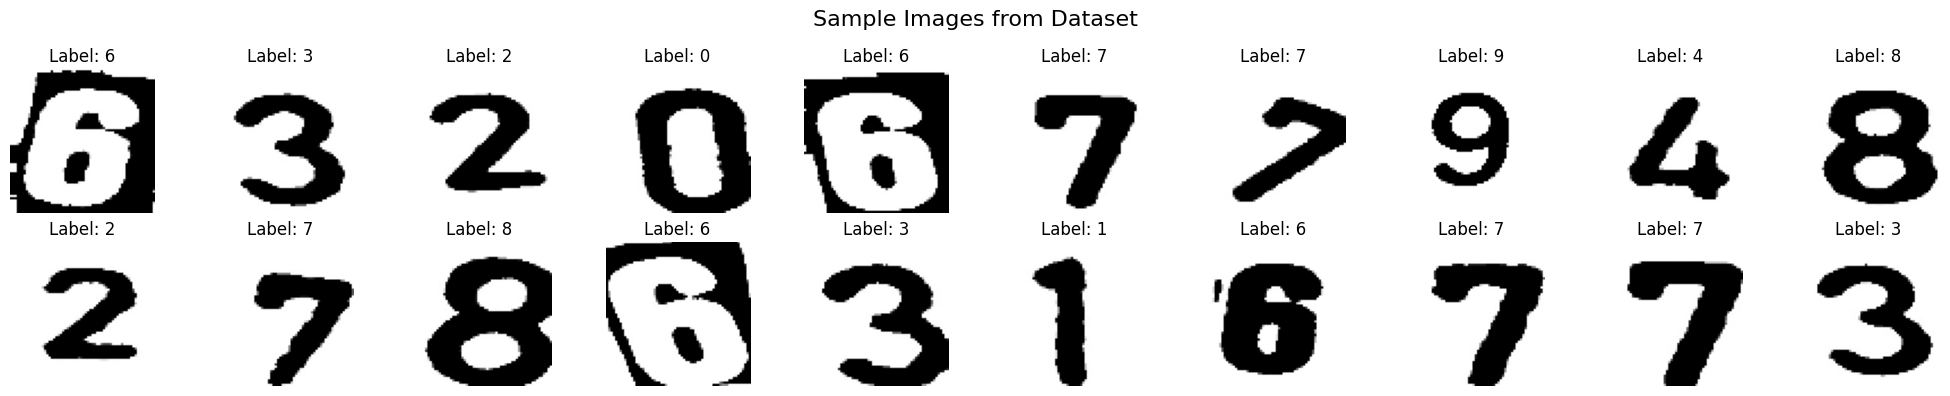

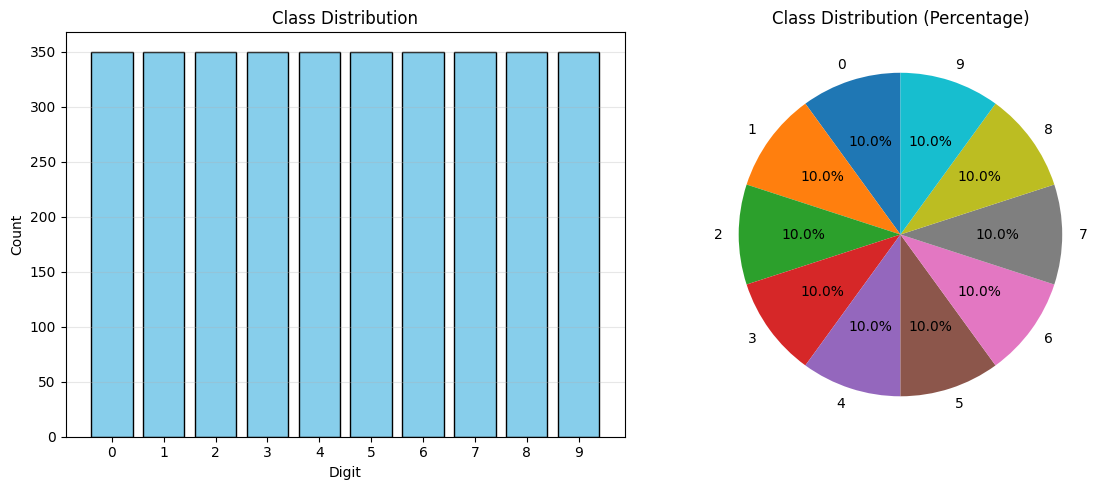

In [44]:
def plot_sample_images(images, labels, num_samples=20):
    """Plot sample images from dataset"""
    fig, axes = plt.subplots(2, 10, figsize=(20, 4))
    fig.suptitle('Sample Images from Dataset', fontsize=16)

    indices = np.random.choice(len(images), num_samples, replace=False)

    for i, idx in enumerate(indices):
        ax = axes[i // 10, i % 10]
        ax.imshow(images[idx], cmap='gray')
        ax.set_title(f'Label: {labels[idx]}')
        ax.axis('off')

    plt.tight_layout()
    plt.show()

# Visualize samples
plot_sample_images(X, y)

# Plot class distribution
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
unique, counts = np.unique(y, return_counts=True)
plt.bar(unique, counts, color='skyblue', edgecolor='black')
plt.xlabel('Digit')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.xticks(unique)
plt.grid(axis='y', alpha=0.3)

plt.subplot(1, 2, 2)
plt.pie(counts, labels=unique, autopct='%1.1f%%', startangle=90)
plt.title('Class Distribution (Percentage)')

plt.tight_layout()
plt.show()

In [45]:
# Normalize pixel values to [0, 1]
X = X.astype('float32') / 255.0

# Reshape for CNN (add channel dimension)
X = X.reshape(-1, IMG_SIZE[0], IMG_SIZE[1], 1)

# One-hot encode labels
y_categorical = to_categorical(y, NUM_CLASSES)

# Split data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X, y_categorical,
    test_size=VALIDATION_SPLIT,
    random_state=42,
    stratify=y
)

print("Data Preprocessing Complete!")
print(f"Training set shape: {X_train.shape}")
print(f"Validation set shape: {X_val.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Validation labels shape: {y_val.shape}")

Data Preprocessing Complete!
Training set shape: (2800, 64, 64, 1)
Validation set shape: (700, 64, 64, 1)
Training labels shape: (2800, 10)
Validation labels shape: (700, 10)


Data Augmentation configured!
Training batches: 88
Validation batches: 22


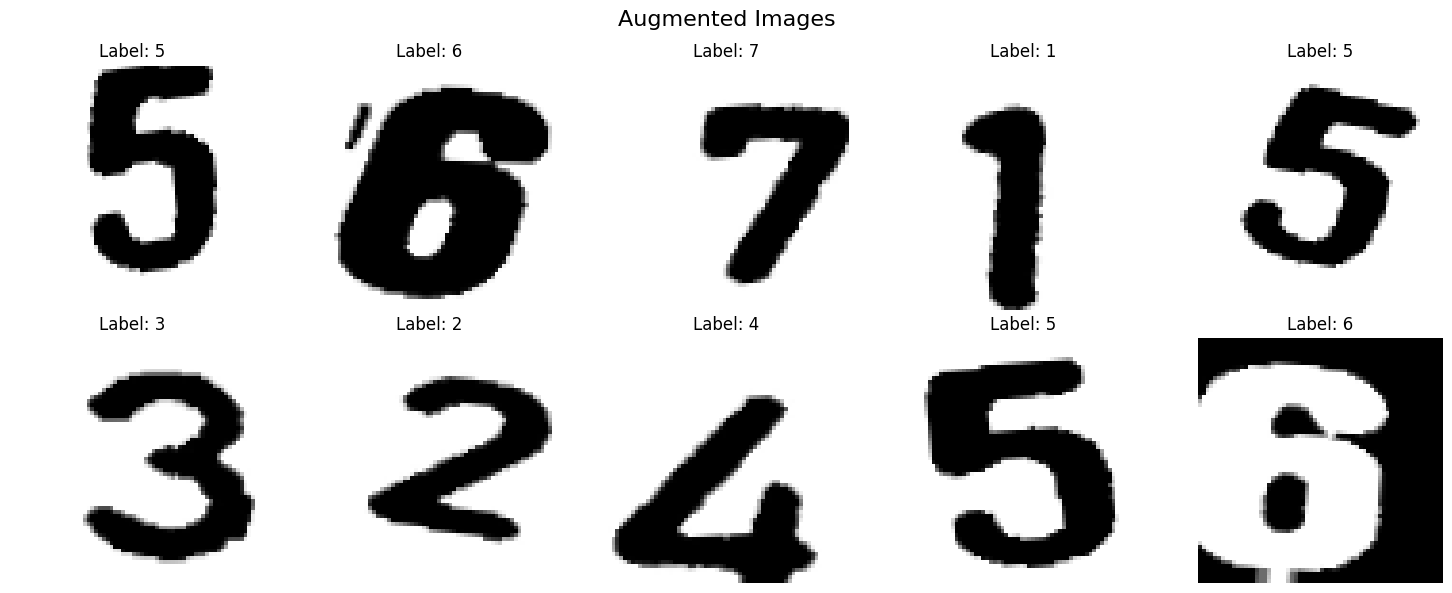

In [46]:
# Create data augmentation generator
train_datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    shear_range=0.1,
    fill_mode='nearest'
)

# Validation data (no augmentation)
val_datagen = ImageDataGenerator()

# Create generators
train_generator = train_datagen.flow(X_train, y_train, batch_size=BATCH_SIZE)
val_generator = val_datagen.flow(X_val, y_val, batch_size=BATCH_SIZE)

print("Data Augmentation configured!")
print(f"Training batches: {len(train_generator)}")
print(f"Validation batches: {len(val_generator)}")

# Visualize augmented images
def show_augmented_images(generator, num_samples=10):
    """Show augmented images"""
    X_batch, y_batch = next(generator)

    fig, axes = plt.subplots(2, 5, figsize=(15, 6))
    fig.suptitle('Augmented Images', fontsize=16)

    for i in range(num_samples):
        ax = axes[i // 5, i % 5]
        ax.imshow(X_batch[i].reshape(IMG_SIZE), cmap='gray')
        ax.set_title(f'Label: {np.argmax(y_batch[i])}')
        ax.axis('off')

    plt.tight_layout()
    plt.show()

show_augmented_images(train_generator)

In [47]:
def build_cnn_model(input_shape, num_classes):
    """Build CNN model for digit recognition"""
    model = models.Sequential([
        # First Convolutional Block
        layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        layers.BatchNormalization(),
        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        # Second Convolutional Block
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        # Third Convolutional Block
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        # Flatten and Dense Layers
        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(128, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])

    return model

# Build model
input_shape = (IMG_SIZE[0], IMG_SIZE[1], 1)
model = build_cnn_model(input_shape, NUM_CLASSES)

# Compile model
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Print model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 64, 64, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 2,421,354 (9.24 MB)

 Trainable params: 2,419,690 (9.23 MB)

 Non-trainable params: 1,664 (6.50 KB)

In [48]:
# Model checkpoint to save best model
checkpoint = ModelCheckpoint(
    MODEL_PATH,
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

# Reduce learning rate on plateau
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=2,
    min_lr=1e-7,
    verbose=1
)

# TensorBoard for visualization
tensorboard = TensorBoard(
    log_dir=LOG_DIR,
    histogram_freq=1
)

callbacks = [checkpoint, early_stopping, reduce_lr, tensorboard]

print("Callbacks configured successfully!")

Callbacks configured successfully!


In [ ]:
print("Starting training...")
print("=" * 70)

history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=val_generator,
    callbacks=callbacks,
    verbose=1
)

print("\nTraining completed!")

# CELL 10: Plot Training History
def plot_training_history(history):
    """Plot training and validation metrics"""
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    # Accuracy plot
    axes[0].plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
    axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
    axes[0].set_title('Model Accuracy', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Epoch')
    axes[0].set_ylabel('Accuracy')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)

    # Loss plot
    axes[1].plot(history.history['loss'], label='Training Loss', linewidth=2)
    axes[1].plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
    axes[1].set_title('Model Loss', fontsize=14, fontweight='bold')
    axes[1].set_xlabel('Epoch')
    axes[1].set_ylabel('Loss')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # Print final metrics
    print("\nFinal Training Metrics:")
    print(f"Training Accuracy: {history.history['accuracy'][-1]:.4f}")
    print(f"Validation Accuracy: {history.history['val_accuracy'][-1]:.4f}")
    print(f"Training Loss: {history.history['loss'][-1]:.4f}")
    print(f"Validation Loss: {history.history['val_loss'][-1]:.4f}")

plot_training_history(history)

Starting training...
Epoch 1/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5015 - loss: 1.7546
Epoch 1: val_accuracy improved from -inf to 0.10000, saving model to model_angka_ktm_best.keras
88/88 ━━━━━━━━━━━━━━━━━━━━ 121s 1s/step - accuracy: 0.5035 - loss: 1.7468 - val_accuracy: 0.1000 - val_loss: 7.4447 - learning_rate: 0.0010
Epoch 2/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8894 - loss: 0.3612
Epoch 2: val_accuracy did not improve from 0.10000
88/88 ━━━━━━━━━━━━━━━━━━━━ 109s 1s/step - accuracy: 0.8897 - loss: 0.3604 - val_accuracy: 0.1000 - val_loss: 10.9959 - learning_rate: 0.0010
Epoch 3/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9479 - loss: 0.1963
Epoch 3: val_accuracy did not improve from 0.10000

Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
88/88 ━━━━━━━━━━━━━━━━━━━━ 108s 1s/step - accuracy: 0.9480 - loss: 0.1961 - val_accuracy: 0.1000 - val_loss: 11.4303 - learning_rate: 0.0010
Epoch 4/50
88/88 ━━━━━━━━━━━━━━━━

In [ ]:
print("Evaluating model on validation set...")

# Load best model (now .keras format)
best_model = keras.models.load_model(MODEL_PATH)

# Evaluate
val_loss, val_accuracy = best_model.evaluate(X_val, y_val, verbose=0)
print(f"\nBest Model - Validation Accuracy: {val_accuracy:.4f}")
print(f"Best Model - Validation Loss: {val_loss:.4f}")

# Predictions
y_pred = best_model.predict(X_val, verbose=0)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_val, axis=1)

# Classification Report
print("\nClassification Report:")
print("=" * 70)
print(classification_report(y_true, y_pred_classes, target_names=[str(i) for i in range(NUM_CLASSES)]))

In [ ]:
# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=range(NUM_CLASSES),
            yticklabels=range(NUM_CLASSES),
            cbar_kws={'label': 'Count'})
plt.title('Confusion Matrix', fontsize=16, fontweight='bold')
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.tight_layout()
plt.show()

# Calculate per-class accuracy
print("\nPer-Class Accuracy:")
print("=" * 50)
for i in range(NUM_CLASSES):
    class_accuracy = cm[i, i] / cm[i].sum() if cm[i].sum() > 0 else 0
    print(f"Digit {i}: {class_accuracy:.4f} ({cm[i, i]}/{cm[i].sum()})")

# CELL 13: Visualize Predictions
def plot_predictions(images, true_labels, pred_labels, num_samples=20):
    """Plot predictions with true labels"""
    fig, axes = plt.subplots(4, 5, figsize=(15, 12))
    fig.suptitle('Predictions vs True Labels', fontsize=16, fontweight='bold')

    indices = np.random.choice(len(images), num_samples, replace=False)

    for i, idx in enumerate(indices):
        ax = axes[i // 5, i % 5]
        ax.imshow(images[idx].reshape(IMG_SIZE), cmap='gray')

        true_label = true_labels[idx]
        pred_label = pred_labels[idx]

        color = 'green' if true_label == pred_label else 'red'
        ax.set_title(f'True: {true_label}\nPred: {pred_label}', color=color, fontweight='bold')
        ax.axis('off')

    plt.tight_layout()
    plt.show()

# Show predictions
plot_predictions(X_val, y_true, y_pred_classes)

# Show misclassified examples
misclassified_indices = np.where(y_true != y_pred_classes)[0]
if len(misclassified_indices) > 0:
    print(f"\nTotal Misclassified: {len(misclassified_indices)}")
    print("Showing misclassified examples...")

    num_show = min(20, len(misclassified_indices))
    selected_indices = misclassified_indices[:num_show]

    plot_predictions(X_val[selected_indices],
                    y_true[selected_indices],
                    y_pred_classes[selected_indices],
                    num_samples=num_show)

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

# PREPROCESSING - TETAP SEDERHANA
def preprocess_digit_simple(digit_roi, img_size=(64, 64)):
    # Langkah 1: Normalisasi awal
    if len(digit_roi.shape) == 3:
        digit_roi = cv2.cvtColor(digit_roi, cv2.COLOR_BGR2GRAY)

    # Jika mayoritas piksel gelap → dibalik dulu
    dark_ratio = np.mean(digit_roi < 127)
    if dark_ratio > 0.5:
        digit_roi = cv2.bitwise_not(digit_roi)

    #  Langkah 2: Threshold
    _, binary = cv2.threshold(digit_roi, 127, 255, cv2.THRESH_BINARY)

    # Langkah 3: Pastikan foreground = hitam
    # Hitung jumlah piksel putih dan hitam
    white_ratio = np.mean(binary == 255)
    black_ratio = np.mean(binary == 0)

    # Jika ternyata lebih banyak hitam → invert
    if black_ratio > white_ratio:
        binary = cv2.bitwise_not(binary)

    # Langkah 4: Crop ketat berdasarkan non-zero
    coords = cv2.findNonZero(255 - binary)
    if coords is not None:
        x, y, w, h = cv2.boundingRect(coords)
        binary = binary[y:y+h, x:x+w]

    # --- Langkah 5: Resize ke 28x28 ---
    binary = cv2.resize(binary, img_size, interpolation=cv2.INTER_AREA)
    return binary


# DETEKSI NIM - DENGAN PERBAIKAN

def detect_nim_only(image_path, model, img_size=(28, 28), debug=False):
    img = cv2.imread(image_path)
    if img is None:
        print("Gagal membaca gambar.")
        return None, None

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    h, w = gray.shape

    # ROI NIM
    roi_y1 = int(h * 0.85)
    roi_y2 = int(h * 0.90)
    roi_x1 = int(w * 0.24)
    roi_x2 = int(w * 0.45)
    roi = gray[roi_y1:roi_y2, roi_x1:roi_x2]

    # Preprocessing ROI
    blur = cv2.GaussianBlur(roi, (3, 3), 0)
    _, thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    kernel = np.ones((2, 2), np.uint8)
    morph = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=1)

    contours, _ = cv2.findContours(morph, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    results = []
    for cnt in contours:
        x, y, w, h = cv2.boundingRect(cnt)

        # Filter ukuran
        if h < 15 or w < 5:
            continue

        # Tight cropping untuk angka 1
        if h / w > 2.5:
            margin = int(w * 0.18)
            x += margin
            w -= 2 * margin
            if w < 4:
                w = 4

        # Extract digit
        digit = roi[y:y+h, x:x+w]
        processed = preprocess_digit_simple(digit, img_size)
        processed_norm = processed.astype('float32') / 255.0
        input_model = processed_norm.reshape(1, *img_size, 1)

        pred = model.predict(input_model, verbose=0)
        digit_pred = np.argmax(pred)
        confidence = pred[0][digit_pred]

        # Logika sederhana: 1 vs 7
        if digit_pred == 7 and h / w > 2.5:
            digit_pred = 1
            confidence = pred[0][1]

        results.append({
            'digit': digit_pred,
            'confidence': confidence,
            'bbox': (x + roi_x1, y + roi_y1, w, h)
        })

    # Urutkan dari kiri ke kanan
    results = sorted(results, key=lambda r: r['bbox'][0])

    if debug:
        plt.imshow(morph, cmap='gray')
        plt.title("Debug: ROI Setelah Preprocessing")
        plt.axis('off')
        plt.show()

    return img, results

# VISUALISASI HASIL KOMPARASI

def visualize_nim_results(img, results):
    if not results:
        print("Tidak ada digit yang terdeteksi.")
        return

    canvas = img.copy()
    number = ''.join([str(r['digit']) for r in results])

    for r in results:
        x, y, w, h = r['bbox']
        cv2.rectangle(canvas, (x, y), (x+w, y+h), (0, 255, 0), 2)
        cv2.putText(canvas, str(r['digit']), (x, y-5),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

    plt.figure(figsize=(10, 4))
    plt.imshow(cv2.cvtColor(canvas, cv2.COLOR_BGR2RGB))
    plt.title(f"NIM Terdeteksi: {number}")
    plt.axis('off')
    plt.show()

    print("NIM:", number)

def visualize_digit_comparison(image_path, results, model, train_dir, img_size=(28, 28)):
    """
    Bandingkan hasil preprocess digit dengan sample acak dari dataset
    (file dataset: angka_{digit}_aug_{nomor}.jpg di folder flat)
    """
    import cv2, os, random
    import numpy as np
    import matplotlib.pyplot as plt

    if not results:
        print("Tidak ada digit yang terdeteksi.")
        return

    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    processed_digits, sample_digits = [], []
    pred_labels, confidences = [], []

    for r in results:
        x, y, w, h = r['bbox']
        digit_roi = gray[y:y+h, x:x+w]

        # Preprocess seperti biasa
        processed = preprocess_digit_simple(digit_roi, img_size)
        processed_norm = processed.astype('float32') / 255.0
        input_model = processed_norm.reshape(1, *img_size, 1)

        pred = model.predict(input_model, verbose=0)
        digit_pred = np.argmax(pred)
        confidence = pred[0][digit_pred]

        processed_digits.append(processed)
        pred_labels.append(digit_pred)
        confidences.append(confidence)

        # Cari sample acak di folder flat
        candidates = [
            f for f in os.listdir(train_dir)
            if f.lower().endswith(('.png', '.jpg', '.jpeg'))
            and f"angka_{digit_pred}_aug_" in f.lower()
        ]

        if candidates:
            chosen = random.choice(candidates)
            sample_path = os.path.join(train_dir, chosen)
            sample_img = cv2.imread(sample_path, cv2.IMREAD_GRAYSCALE)
            if sample_img is not None:
                sample_img = cv2.resize(sample_img, img_size)
                sample_digits.append(sample_img)
                continue

        # fallback kosong kalau tidak ketemu
        sample_digits.append(np.zeros(img_size, dtype=np.uint8))

    fig, axes = plt.subplots(2, 1, figsize=(max(6, len(results) * 1.5), 5))

    combined_proc = np.hstack(processed_digits)
    axes[0].imshow(combined_proc, cmap='gray')
    axes[0].set_title("Hasil Preprocessing Tiap Digit", fontsize=12)
    axes[0].axis('off')

    combined_sample = np.hstack(sample_digits)
    axes[1].imshow(combined_sample, cmap='gray')
    axes[1].set_title("Sample Acak dari Dataset Berdasarkan Label Prediksi", fontsize=12)
    axes[1].axis('off')

    conf_text = " | ".join([f"{lbl}: {conf:.2f}" for lbl, conf in zip(pred_labels, confidences)])
    fig.text(0.5, 0.03, conf_text, ha='center', fontsize=10, color='black', weight='bold')

    plt.tight_layout(rect=[0, 0.05, 1, 1])
    plt.show()

# MAIN
MODEL_PATH = r'D:\File untuk kuliah\Semester-5\Pengolahan Citra dan Visi Komputer\colab_ipynb\PCVK\model_angka_ktm_best.keras'
IMAGE_PATH = ''
TRAIN_DIR = ''

model = keras.models.load_model(MODEL_PATH)
IMG_SIZE = (model.input_shape[1], model.input_shape[2])

img, results = detect_nim_only(IMAGE_PATH, model, img_size=IMG_SIZE, debug=False)
visualize_nim_results(img, results)
visualize_digit_comparison(IMAGE_PATH, results, model, TRAIN_DIR, img_size=IMG_SIZE)

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras


# PREPROCESSING - TETAP SEDERHANA

def preprocess_digit_simple(digit_roi, img_size=(64, 64)):
    #  Langkah 1: Normalisasi awal
    if len(digit_roi.shape) == 3:
        digit_roi = cv2.cvtColor(digit_roi, cv2.COLOR_BGR2GRAY)

    # Langkah 2: Gaussian blur untuk mengurangi noise
    blurred = cv2.GaussianBlur(digit_roi, (3, 3), 0)

    #  Langkah 3: Threshold adaptif (lebih baik dari OTSU untuk kontras rendah)
    binary = cv2.adaptiveThreshold(
        blurred, 255,
        cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
        cv2.THRESH_BINARY,
        11, 2
    )

    #  Langkah 4: Pastikan background = putih, foreground = hitam -
    border_pixels = np.concatenate([
        binary[0, :], binary[-1, :], binary[:, 0], binary[:, -1]
    ])

    if np.mean(border_pixels == 0) > 0.5:
        binary = cv2.bitwise_not(binary)

    #  Langkah 5: Morphological cleaning untuk hapus noise kecil
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2, 2))
    binary = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel, iterations=1)
    binary = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel, iterations=1)

    # Langkah 6: Crop ketat berdasarkan foreground
    coords = cv2.findNonZero(255 - binary)
    if coords is not None:
        x, y, w, h = cv2.boundingRect(coords)
        binary = binary[y:y+h, x:x+w]

    # Langkah 7: Padding sedikit sebelum resize
    pad = 4
    binary = cv2.copyMakeBorder(binary, pad, pad, pad, pad,
                                cv2.BORDER_CONSTANT, value=255)

    # Langkah 8: Resize ke ukuran target
    binary = cv2.resize(binary, img_size, interpolation=cv2.INTER_AREA)

    return binary

# DETEKSI NIM - DENGAN PERBAIKAN

def detect_nim_only(image_path, model, img_size=(28, 28), debug=False):
    img = cv2.imread(image_path)
    if img is None:
        print("Gagal membaca gambar.")
        return None, None, None

    img = cv2.resize(img, (1186, 755), interpolation=cv2.INTER_AREA)

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    h, w = gray.shape

    # ROI NIM
    roi_y1 = int(h * 0.85)
    roi_y2 = int(h * 0.90)
    roi_x1 = int(w * 0.20)  # Diubah dari 0.24 ke 0.15
    roi_x2 = int(w * 0.40)  # Diubah dari 0.45 ke 0.40
    roi = gray[roi_y1:roi_y2, roi_x1:roi_x2]

    # Simpan koordinat ROI untuk visualisasi
    roi_coords = (roi_x1, roi_y1, roi_x2, roi_y2)

    # Preprocessing ROI
    blur = cv2.GaussianBlur(roi, (3, 3), 0)
    _, thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    kernel = np.ones((2, 2), np.uint8)
    morph = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=1)

    contours, _ = cv2.findContours(morph, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    results = []
    for cnt in contours:
        x, y, w, h = cv2.boundingRect(cnt)

        # Filter ukuran
        if h < 15 or w < 5:
            continue

        # Tight cropping untuk angka 1
        if h / w > 2.5:
            margin = int(w * 0.18)
            x += margin
            w -= 2 * margin
            if w < 4:
                w = 4

        # Extract digit
        digit = roi[y:y+h, x:x+w]
        processed = preprocess_digit_simple(digit, img_size)
        processed_norm = processed.astype('float32') / 255.0
        input_model = processed_norm.reshape(1, *img_size, 1)

        pred = model.predict(input_model, verbose=0)
        digit_pred = np.argmax(pred)
        confidence = pred[0][digit_pred]

        # Logika sederhana: 1 vs 7
        if digit_pred == 7 and h / w > 2.5:
            digit_pred = 1
            confidence = pred[0][1]

        results.append({
            'digit': digit_pred,
            'confidence': confidence,
            'bbox': (x + roi_x1, y + roi_y1, w, h)
        })

    # Urutkan dari kiri ke kanan
    results = sorted(results, key=lambda r: r['bbox'][0])

    if debug:
        plt.imshow(morph, cmap='gray')
        plt.title("Debug: ROI Setelah Preprocessing")
        plt.axis('off')
        plt.show()

    return img, results, roi_coords

# VISUALISASI HASIL KOMPARASI

def visualize_nim_results(img, results, roi_coords=None):
    if not results:
        print("Tidak ada digit yang terdeteksi.")
        return

    canvas = img.copy()
    number = ''.join([str(r['digit']) for r in results])

    # Gambar ROI box (biru) jika ada
    if roi_coords is not None:
        roi_x1, roi_y1, roi_x2, roi_y2 = roi_coords
        cv2.rectangle(canvas, (roi_x1, roi_y1), (roi_x2, roi_y2), (255, 0, 0), 2)
        cv2.putText(canvas, "ROI NIM", (roi_x1, roi_y1-10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 0, 0), 2)

    # Gambar bbox digit (hijau)
    for r in results:
        x, y, w, h = r['bbox']
        cv2.rectangle(canvas, (x, y), (x+w, y+h), (0, 255, 0), 2)
        cv2.putText(canvas, str(r['digit']), (x, y-5),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

    plt.figure(figsize=(12, 6))
    plt.imshow(cv2.cvtColor(canvas, cv2.COLOR_BGR2RGB))
    plt.title(f"NIM Terdeteksi: {number}\n(Biru = ROI Detection, Hijau = Digit BBox)", fontsize=12)
    plt.axis('off')
    plt.show()

    print("NIM:", number)

def visualize_digit_comparison(image_path, results, model, train_dir, img_size=(28, 28)):
    """
    Bandingkan hasil preprocess digit dengan sample acak dari dataset
    (file dataset: angka_{digit}_aug_{nomor}.jpg di folder flat)
    """
    import cv2, os, random
    import numpy as np
    import matplotlib.pyplot as plt

    if not results:
        print("Tidak ada digit yang terdeteksi.")
        return

    # Baca dan resize gambar dengan cara yang SAMA seperti di detect_nim_only
    img = cv2.imread(image_path)
    img = cv2.resize(img, (1186, 755), interpolation=cv2.INTER_AREA)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    processed_digits, sample_digits = [], []
    pred_labels, confidences = [], []

    for r in results:
        x, y, w, h = r['bbox']
        digit_roi = gray[y:y+h, x:x+w]

        # Preprocess seperti biasa
        processed = preprocess_digit_simple(digit_roi, img_size)
        processed_norm = processed.astype('float32') / 255.0
        input_model = processed_norm.reshape(1, *img_size, 1)

        pred = model.predict(input_model, verbose=0)
        digit_pred = np.argmax(pred)
        confidence = pred[0][digit_pred]

        processed_digits.append(processed)
        pred_labels.append(digit_pred)
        confidences.append(confidence)

        # Cari sample acak di folder flat

        candidates = [
            f for f in os.listdir(train_dir)
            if f.lower().endswith(('.png', '.jpg', '.jpeg'))
            and f"angka_{digit_pred}_aug_" in f.lower()
        ]

        if candidates:
            chosen = random.choice(candidates)
            sample_path = os.path.join(train_dir, chosen)
            sample_img = cv2.imread(sample_path, cv2.IMREAD_GRAYSCALE)
            if sample_img is not None:
                sample_img = cv2.resize(sample_img, img_size)
                sample_digits.append(sample_img)
                continue

        # fallback kosong kalau tidak ketemu
        sample_digits.append(np.zeros(img_size, dtype=np.uint8))


    # Visualisasi

    fig, axes = plt.subplots(2, 1, figsize=(max(6, len(results) * 1.5), 5))

    combined_proc = np.hstack(processed_digits)
    axes[0].imshow(combined_proc, cmap='gray')
    axes[0].set_title("Hasil Preprocessing Tiap Digit", fontsize=12)
    axes[0].axis('off')

    combined_sample = np.hstack(sample_digits)
    axes[1].imshow(combined_sample, cmap='gray')
    axes[1].set_title("Sample Acak dari Dataset Berdasarkan Label Prediksi", fontsize=12)
    axes[1].axis('off')

    conf_text = " | ".join([f"{lbl}: {conf:.2f}" for lbl, conf in zip(pred_labels, confidences)])
    fig.text(0.5, 0.03, conf_text, ha='center', fontsize=10, color='black', weight='bold')

    plt.tight_layout(rect=[0, 0.05, 1, 1])
    plt.show()



# MAIN
MODEL_PATH = r'D:\File untuk kuliah\Semester-5\Pengolahan Citra dan Visi Komputer\colab_ipynb\PCVK\model_angka_ktm_best.keras'
IMAGE_PATH = ''
TRAIN_DIR = '

model = keras.models.load_model(MODEL_PATH)
IMG_SIZE = (model.input_shape[1], model.input_shape[2])

img, results, roi_coords = detect_nim_only(IMAGE_PATH, model, img_size=IMG_SIZE, debug=False)
visualize_nim_results(img, results, roi_coords)
visualize_digit_comparison(IMAGE_PATH, results, model, TRAIN_DIR, img_size=IMG_SIZE)